# アヤメの分類
sklearn で用意されているアヤメ（iris）のデータセットを使って、種類不明のアヤメが何の種類に属するか予測する。  
使用するデータセットには、次の4つの特徴量と正解ラベルが150個体分含まれている。

**特徴量**
- Sepal Length （がくの長さ）
- Sepal Width （がくの幅）
- Petal Length （花びらの長さ）
- Petal Width （花びらの幅）

**正解ラベル**
- setosa / versicolor / virginica のいずれか（target）

## 手順

### 1. アヤメのデータを用意する

In [0]:
from pandas import DataFrame # データ解析を支援する機能を提供するモジュール
from sklearn.datasets import load_iris # アヤメの花(学習するデータ)

iris = load_iris() # アヤメの花データ(150個)を読み込む
df = DataFrame(iris.data, columns=iris.feature_names) # irisをDataFrameで扱う
df['target'] = iris.target_names[iris.target] # アヤメの種別(正解ラベル)を追加する

df.head() # データを確認する

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. 訓練データとテストデータに分ける

In [0]:
# 訓練データとテストデータに分けるためのモジュール
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1) # 特徴量4つ×150を格納する
Y = df['target'] # 正解ラベル×150を格納する

# 訓練データとテストデータが 4:1 になるように分割する。random_stateは乱数を固定
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### 3. 訓練データを使ってモデルを作る
今回は決定木を使ってモデルを作成する。

[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(209.25, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]')]

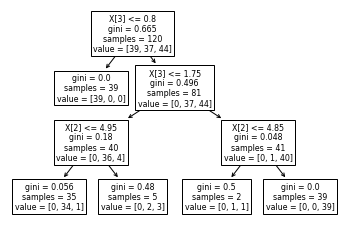

In [0]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # 決定木を使用するためのモジュール

# 決定木インスタンス(木の深さ3)
estimator = DecisionTreeClassifier(max_depth=3)
# 学習モデルを構築する。引数に訓練データの特徴量と、それに対応した正解ラベルを渡す
estimator.fit(X_train, Y_train)
# 決定木を出力してみる
plot_tree(estimator)

### 4. テストデータを使って精度を知る

In [0]:
# 平均正解率を算出する
print('train score:', estimator.score(X_train, Y_train))
print('test score:', estimator.score(X_test, Y_test))

train score: 0.9666666666666667
test score: 0.9666666666666667


### 5. 未知のアヤメがどの種類に属するか予測する
今回は次の特徴量をもつアヤメの種類を予測する。

- Sepal Length：5.2cm
- Sepal Width：3.0cm
- Petal Length：1.5cm
- Petal Width：0.6cm

In [0]:
# 予測したいデータ
data = [[5.2, 3.0, 1.5, 0.6]]

# 構築したモデルからアヤメの種類を求める
estimator.predict(data)

array(['setosa'], dtype=object)